# Import library

In [1]:
# NGUYỄN HOÀNG SANG
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode 
pd.set_option('Display.max_columns',None)

## Verify coding environment

In [2]:
!which python

/home/sam/anaconda3/bin/python


# Data Preprocessing and Cleaning

## Import data

In [3]:
data_df=pd.read_csv('Data/Sex_Offender_Registry.csv')
data_df.head(5)

,X,Y,OBJECTID,BLOCK_X,BLOCK_Y,DCS_LAST_MOD_DTM,SEXOFFENDERCODE,ADDDATE,LASTNAME,FIRSTNAME,ALIASES,MAXCLASSIFICATION,BIRTHDATE,HEIGHTNUM,WEIGHTNUM,EYECOLOR,HAIRCOLOR,MARKINGS,REGISTRATIONDATE,TYPE,DISTRICT,PSA,BLOCKNAME,QUADRANT,ZIP
0,-76.973974,38.863542,4236689,402259,132858,2021/01/14 06:15:24+00,002-910,2016/08/02 09:34:44+00,SANDERS,ANTHONY,DERRICK JUICE / X JUICE / ANTHONY SANDERS /...,A,1969/06/19 00:00:00+00,66,138,BROWN,BLACK,TATTOO-LEFT WRIST: CHINESE SYMBOL; RIGHT WRIST...,2016/08/29 00:00:00+00,HOME,6.0,607.0,2300 - 2399 BLOCK OF GOOD HOPE ROAD SE,SE,20020
1,-76.972648,38.857499,4236690,402374,132187,2021/01/14 06:15:24+00,002-913,2016/08/04 14:42:53+00,GAYLES,JERMAINE,ROBERT GAYLES / JERMAINE IRVIN / JERMAINE I...,B,1986/06/25 00:00:00+00,73,200,BROWN,BLACK,NaN,2018/02/22 00:00:00+00,HOME,7.0,701.0,2300 - 2399 BLOCK OF AINGER PLACE SE,SE,20020
2,-76.971451,38.932130,4236691,402476,140472,2021/01/14 06:15:24+00,002-919,2016/08/09 18:06:15+00,HARRIS,REGINALD,REGINALD ELBERT HARRIS-WILLS,B,1995/02/12 00:00:00+00,67,157,BROWN,BLACK,"TATTOO ON LOWER RIGHT ARM ""LAMONT""; TATTOO ON ...",2016/10/20 00:00:00+00,HOME,5.0,503.0,2400 - 2499 BLOCK OF LAWRENCE STREET NE,NE,20018
3,-77.010605,38.914089,4236692,399080,138468,2021/01/14 06:15:24+00,002-927,2016/08/30 11:29:37+00,STRICKLAND,GARY,MELVIN,B,1967/01/22 00:00:00+00,74,245,BROWN,BLACK,"TATTOO ON SHOULDER ""TINA""; GUNSHOT WOUNDS ON B...",2016/09/01 00:00:00+00,HOME,3.0,308.0,1 - 99 BLOCK OF S STREET NW,NW,20001
4,-77.021917,38.913356,4236693,398099,138387,2021/01/14 06:15:24+00,002-928,2016/08/31 10:07:09+00,GANT,TIMOTHY,TIMOTHY GANT,B,1989/09/19 00:00:00+00,71,285,BROWN,BLACK,TATTOO ON LEFT SHOULDER 'PICTURE OF A CROSS WI...,2017/02/09 00:00:00+00,WORK,3.0,308.0,1700 - 1799 BLOCK OF 7TH STREET NW,NW,20001


## Data exploring 

### Shape of dataset

In [4]:
data_df.shape

(1323, 25)

This dataset includes 1323 data rows and 25 columns (24 attributes)

### Read data description

In [5]:
descrition=open('DataDescription.txt','r')
print(descrition.read())

Context
Sex Offender work and home locations, created as part of the DC Geographic Information System (DC GIS) for the D.C. Office of the Chief Technology Officer (OCTO) and participating D.C. government agencies. If users want to obtain more information about sex offenders, they should go to the Sex Offender Mapping Application (here) and download the “More Details” PDF. A database provided by the Court Services and Offender Supervision Agency identified sex offender registry providing location at the block level. https://www.csosa.gov/.

File information
the data set is CSV file

Content
Column Features
This data contain

1.ADDDATE
2.ALIASES
3.BIRTHDATE
4.Date or Time
5.BLOCKX 
6.BLOCKY
7.BLOCKNAME
8.DCSLASTMOD_DTM
9.DISTRICT
10.EYECOLOR
11.FIRSTNAME
12.HAIRCOLOR
13.HEIGHTNUM
14.LASTNAME
15.MARKINGS
16.MAXCLASSIFICATION
17.OBJECTID
18.Unique ID
19.PSA
20.QUADRANT
21.REGISTRATIONDATE
22.SEXOFFENDERCODE
23.Shape
24.TYPE
25.WEIGHTNUM
26.ZIP

additional info
The Sex Offender Registry dat

In [6]:
def missing_ratio(x):
    return x.isna().mean()*100
def diff_vals(x):
    return x.unique()
def num_diff_vals(x):
    if missing_ratio(x) > 0:
        num = len(diff_vals(x)) -1
    else:
        num = len(diff_vals(x))
    return num
data_df.agg(num_diff_vals)

X                     887
Y                     887
OBJECTID             1323
BLOCK_X               800
BLOCK_Y               804
DCS_LAST_MOD_DTM        1
SEXOFFENDERCODE      1059
ADDDATE               769
LASTNAME              703
FIRSTNAME             455
ALIASES               630
MAXCLASSIFICATION       2
BIRTHDATE            1022
HEIGHTNUM              24
WEIGHTNUM             145
EYECOLOR                8
HAIRCOLOR              11
MARKINGS              325
REGISTRATIONDATE      897
TYPE                    3
DISTRICT                7
PSA                    57
BLOCKNAME             887
QUADRANT                4
ZIP                    27
dtype: int64

- PSA = Public Safety Assessment : đánh giá an toàn cộng đồng

- The attributes relating to ID such as:'SEXOFFENDERCODE', do not have much meanings so they could be eliminated
- The values of the attribute 'DCS_LAST_MOD_DTM' are the same for whole so they could be also eliminated
- Name attributes don't affect much, so be eliminated  

In [7]:
eliminated=['SEXOFFENDERCODE','DCS_LAST_MOD_DTM','LASTNAME','FIRSTNAME']
data_df=data_df.drop(eliminated,axis=1)

### Duplicate check

In [8]:
data_df.duplicated().sum()

0

There is no duplicated data row in this dataset

### Dataset more detail
#### Types of data 

In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  1323 non-null   float64
 1   Y                  1323 non-null   float64
 2   OBJECTID           1323 non-null   int64  
 3   BLOCK_X            1323 non-null   int64  
 4   BLOCK_Y            1323 non-null   int64  
 5   ADDDATE            1323 non-null   object 
 6   ALIASES            787 non-null    object 
 7   MAXCLASSIFICATION  1323 non-null   object 
 8   BIRTHDATE          1323 non-null   object 
 9   HEIGHTNUM          1323 non-null   int64  
 10  WEIGHTNUM          1323 non-null   int64  
 11  EYECOLOR           1323 non-null   object 
 12  HAIRCOLOR          1323 non-null   object 
 13  MARKINGS           408 non-null    object 
 14  REGISTRATIONDATE   1323 non-null   object 
 15  TYPE               1323 non-null   object 
 16  DISTRICT           1319 

There are 3 main dtypes in this dataset including: float, int and object. However, there are some unsual in the data type of such as: DCS_LAST_MOD_DTM, ADDDATE, BIRTHDATE, REGISTRATIONDATE  relating to datetime. They should be meant as datetime dtype instead of object

##### Convert mentioned attributes to Datetime 
- with DCS_LAST_MOD_DTM, BIRTHDATE, REGISTRATIONDATE the infomation about hour seem not any values so it is able to remove it
- with ADDDATE keep the information of hour

In [10]:
datetime_cols_no_hour=['BIRTHDATE','REGISTRATIONDATE']
data_df[datetime_cols_no_hour]=data_df[datetime_cols_no_hour].apply(pd.to_datetime, format = '%Y/%m/%d')
data_df[datetime_cols_no_hour].astype('datetime64[ns]')
data_df['ADDDATE']=data_df['ADDDATE'].apply(pd.to_datetime,format='%Y/%m/%d %H:%M:%S')
data_df

,X,Y,OBJECTID,BLOCK_X,BLOCK_Y,ADDDATE,ALIASES,MAXCLASSIFICATION,BIRTHDATE,HEIGHTNUM,WEIGHTNUM,EYECOLOR,HAIRCOLOR,MARKINGS,REGISTRATIONDATE,TYPE,DISTRICT,PSA,BLOCKNAME,QUADRANT,ZIP
0,-76.973974,38.863542,4236689,402259,132858,2016-08-02 09:34:44+00:00,DERRICK JUICE / X JUICE / ANTHONY SANDERS /...,A,1969-06-19 00:00:00+00:00,66,138,BROWN,BLACK,TATTOO-LEFT WRIST: CHINESE SYMBOL; RIGHT WRIST...,2016-08-29 00:00:00+00:00,HOME,6.0,607.0,2300 - 2399 BLOCK OF GOOD HOPE ROAD SE,SE,20020
1,-76.972648,38.857499,4236690,402374,132187,2016-08-04 14:42:53+00:00,ROBERT GAYLES / JERMAINE IRVIN / JERMAINE I...,B,1986-06-25 00:00:00+00:00,73,200,BROWN,BLACK,NaN,2018-02-22 00:00:00+00:00,HOME,7.0,701.0,2300 - 2399 BLOCK OF AINGER PLACE SE,SE,20020
2,-76.971451,38.932130,4236691,402476,140472,2016-08-09 18:06:15+00:00,REGINALD ELBERT HARRIS-WILLS,B,1995-02-12 00:00:00+00:00,67,157,BROWN,BLACK,"TATTOO ON LOWER RIGHT ARM ""LAMONT""; TATTOO ON ...",2016-10-20 00:00:00+00:00,HOME,5.0,503.0,2400 - 2499 BLOCK OF LAWRENCE STREET NE,NE,20018
3,-77.010605,38.914089,4236692,399080,138468,2016-08-30 11:29:37+00:00,MELVIN,B,1967-01-22 00:00:00+00:00,74,245,BROWN,BLACK,"TATTOO ON SHOULDER ""TINA""; GUNSHOT WOUNDS ON B...",2016-09-01 00:00:00+00:00,HOME,3.0,308.0,1 - 99 BLOCK OF S STREET NW,NW,20001
4,-77.021917,38.913356,4236693,398099,138387,2016-08-31 10:07:09+00:00,TIMOTHY GANT,B,1989-09-19 00:00:00+00:00,71,285,BROWN,BLACK,TATTOO ON LEFT SHOULDER 'PICTURE OF A CROSS WI...,2017-02-09 00:00:00+00:00,WORK,3.0,308.0,1700 - 1799 BLOCK OF 7TH STREET NW,NW,20001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,-76.991535,38.878848,4237792,400735,134556,2012-08-06 11:18:48+00:00,MARQUETTE KEVON JENKINS,A,1991-04-23 00:00:00+00:00,66,205,BROWN,BLACK,NaN,2012-08-23 00:00:00+00:00,WORK,1.0,106.0,800 - 999 BLOCK OF 11TH STREET SE,SE,20003
1319,-76.972864,38.868251,4237793,402355,133380,2012-08-06 11:18:48+00:00,MARQUETTE KEVON JENKINS,A,1991-04-23 00:00:00+00:00,66,205,BROWN,BLACK,NaN,2012-08-23 00:00:00+00:00,HOME,6.0,607.0,2238 - 2399 BLOCK OF S STREET SE,SE,20020
1320,-76.965604,38.874895,4237794,402985,134118,2011-04-07 15:02:37+00:00,LAWRENE LEWIS WASHINGTON,B,1982-06-05 00:00:00+00:00,70,165,BROWN,BLACK,NaN,2011-04-18 00:00:00+00:00,WORK,6.0,605.0,1300 - 1349 BLOCK OF ANACOSTIA ROAD SE,SE,20019
1321,-76.935537,38.881093,4237795,405593,134808,2011-04-07 15:02:37+00:00,LAWRENE LEWIS WASHINGTON,B,1982-06-05 00:00:00+00:00,70,165,BROWN,BLACK,NaN,2011-04-18 00:00:00+00:00,HOME,6.0,604.0,600 - 699 BLOCK OF 46TH PLACE SE,SE,20019


##### Missing rate of dataset

In [11]:
data_df.agg(missing_ratio)

X                     0.000000
Y                     0.000000
OBJECTID              0.000000
BLOCK_X               0.000000
BLOCK_Y               0.000000
ADDDATE               0.000000
ALIASES              40.513983
MAXCLASSIFICATION     0.000000
BIRTHDATE             0.000000
HEIGHTNUM             0.000000
WEIGHTNUM             0.000000
EYECOLOR              0.000000
HAIRCOLOR             0.000000
MARKINGS             69.160998
REGISTRATIONDATE      0.000000
TYPE                  0.000000
DISTRICT              0.302343
PSA                   0.377929
BLOCKNAME             0.000000
QUADRANT              0.000000
ZIP                   0.000000
dtype: float64

- The missing data occurs in 4 data fields including: ALIASES, MARKINGS, DISTRICT, PSA. However, ALIASES and MARKINGS missing data possibly decribe that they don't have. 'DISTRICT' will be filled by the most popular value and 'PSA' will be filled by mean

##### Fill missing data of the attributes 'ALIASES, MARKINGS'  by NaN & 'DISTRICT' --> the most popular, 'PSA' --> mean 

In [12]:
data_df['ALIASES']=data_df['ALIASES'].fillna('NaN')
data_df['MARKINGS']=data_df['MARKINGS'].fillna('NaN')
#df=data_df['DISTRICT'].fillna(data_df['DISTRICT'].mode()[0],inplace=True)
data_df['DISTRICT']=data_df['DISTRICT'].fillna(data_df['DISTRICT'].mode()[0])
data_df['PSA']=data_df['PSA'].fillna(int(data_df['PSA'].mean()))

##### Consider to Numeric attributes

In [13]:
# Get numeric attributes into another dataframe 
numeric_df=data_df.select_dtypes(include=np.number)
numeric_df.head(5)

,X,Y,OBJECTID,BLOCK_X,BLOCK_Y,HEIGHTNUM,WEIGHTNUM,DISTRICT,PSA,ZIP
0,-76.973974,38.863542,4236689,402259,132858,66,138,6.0,607.0,20020
1,-76.972648,38.857499,4236690,402374,132187,73,200,7.0,701.0,20020
2,-76.971451,38.932130,4236691,402476,140472,67,157,5.0,503.0,20018
3,-77.010605,38.914089,4236692,399080,138468,74,245,3.0,308.0,20001
4,-77.021917,38.913356,4236693,398099,138387,71,285,3.0,308.0,20001


In [14]:
numeric_df[['HEIGHTNUM','WEIGHTNUM','PSA']].describe().T

,count,mean,std,min,25%,50%,75%,max
HEIGHTNUM,1323.0,69.484505,3.289192,54.0,67.0,69.0,72.0,80.0
WEIGHTNUM,1323.0,190.503401,38.670773,110.0,164.5,185.0,211.5,430.0
PSA,1323.0,472.557823,205.723218,101.0,305.0,506.0,608.0,708.0


##### Consider the relationship between X, Y and BLOCK_X, BLOCK_Y

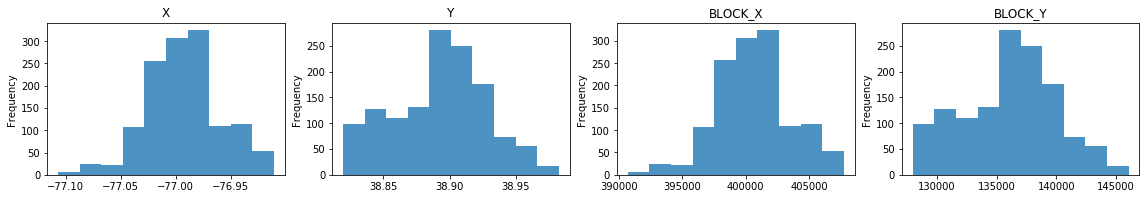

In [15]:
draw_columns=['X', 'Y', 'BLOCK_X', 'BLOCK_Y']
i=1
plt.figure(figsize=(40,80))
for col in draw_columns:
    ax=plt.subplot(24,8,i)
    numeric_df[col].plot.hist(alpha=0.8,ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')
    i=i+1

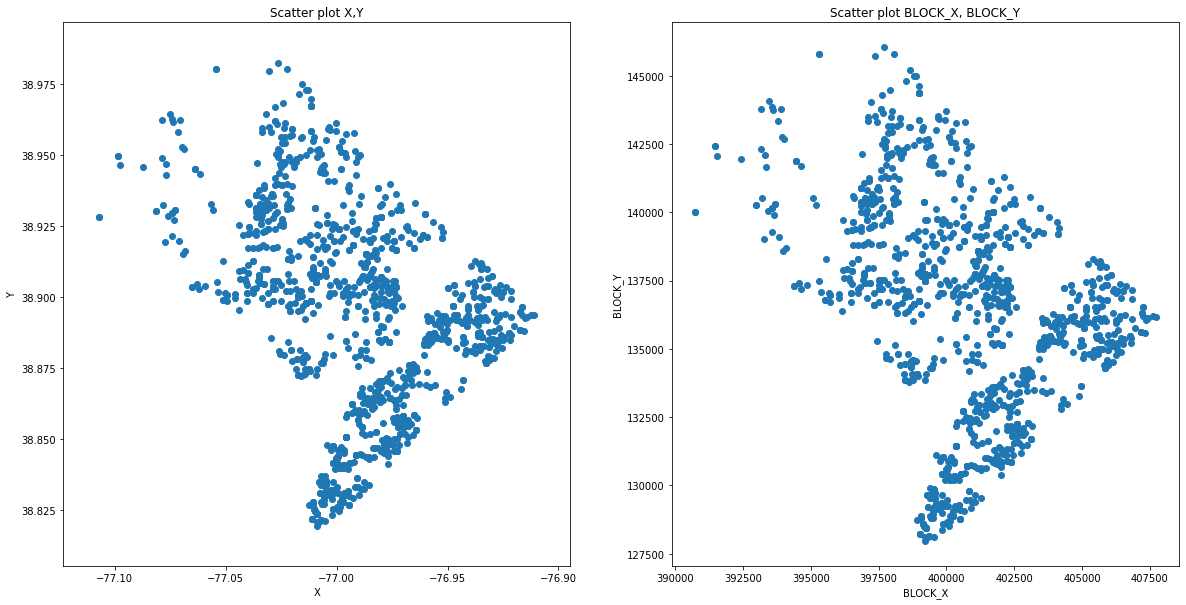

In [16]:
f, ax = plt.subplots(1,2, figsize = (20,10))
ax[0].scatter(numeric_df.X, numeric_df.Y, )
ax[0].set_title('Scatter plot X,Y')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')

ax[1].scatter(numeric_df.BLOCK_X, numeric_df.BLOCK_Y)
ax[1].set_title('Scatter plot BLOCK_X, BLOCK_Y')
ax[1].set_xlabel('BLOCK_X')
ax[1].set_ylabel('BLOCK_Y')
plt.show()

- Assumption: There is a correlation between (X and BLOCK_X) & (Y and BLOCK_Y). We can remove BLOCK_X & BLOCK_Y and keep the others because X & Y can decribe location more clearly.

In [34]:
data_df=data_df.drop(['BLOCK_X','BLOCK_Y'],axis=1)

##### Consider categorical attributes

In [28]:
category_df=data_df.select_dtypes(include=['object'])
category_df.head(5)

,ALIASES,MAXCLASSIFICATION,EYECOLOR,HAIRCOLOR,MARKINGS,TYPE,BLOCKNAME,QUADRANT
0,DERRICK JUICE / X JUICE / ANTHONY SANDERS /...,A,BROWN,BLACK,TATTOO-LEFT WRIST: CHINESE SYMBOL; RIGHT WRIST...,HOME,2300 - 2399 BLOCK OF GOOD HOPE ROAD SE,SE
1,ROBERT GAYLES / JERMAINE IRVIN / JERMAINE I...,B,BROWN,BLACK,NaN,HOME,2300 - 2399 BLOCK OF AINGER PLACE SE,SE
2,REGINALD ELBERT HARRIS-WILLS,B,BROWN,BLACK,"TATTOO ON LOWER RIGHT ARM ""LAMONT""; TATTOO ON ...",HOME,2400 - 2499 BLOCK OF LAWRENCE STREET NE,NE
3,MELVIN,B,BROWN,BLACK,"TATTOO ON SHOULDER ""TINA""; GUNSHOT WOUNDS ON B...",HOME,1 - 99 BLOCK OF S STREET NW,NW
4,TIMOTHY GANT,B,BROWN,BLACK,TATTOO ON LEFT SHOULDER 'PICTURE OF A CROSS WI...,WORK,1700 - 1799 BLOCK OF 7TH STREET NW,NW
